# Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ks_2samp
import itertools
from scipy.stats import epps_singleton_2samp
from scipy.stats import kstest
from scipy.stats import chisquare
from scipy.stats import brunnermunzel 

## Data Reading

In [3]:
altruism_df = pd.read_csv('/Users/aaronberman/Desktop/Altruism & Lying Aversion/data/altruism_all_data_df.csv', index_col=0)

## Data Cleaning

In [5]:
# Look at all of the columns
altruism_df.columns

Index(['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)',
       'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel',
       'UserLanguage', 'Consent', 'TimerInstrucs_First Click',
       'TimerInstrucs_Last Click', 'TimerInstrucs_Page Submit',
       'TimerInstrucs_Click Count', 'TimerInstrucsCont_First Click',
       'TimerInstrucsCont_Last Click', 'TimerInstrucsCont_Page Submit',
       'TimerInstrucsCont_Click Count', 'Min Tokens', 'Max Tokens', 'SM',
       'University', 'decision', 'nationality', 'gender',
       'Big5 Gosling 2003_1', 'Big5 Gosling 2003_2', 'Big5 Gosling 2003_3',
       'Big5 Gosling 2003_4', 'Big5 Gosling 2003_5', 'Big5 Gosling 2003_6',
       'Big5 Gosling 2003_7', 'Big5 Gosling 2003_8', 'Big5 Gosling 2003_9',
       'Big5 Gosling 2003_10', 'understand', 'Location', 'Total', 'Partner',
       'session_id', 'recruiter_id', 'public_id', 'Role', 'Treatment', 'Wave',
       'email'],
      dtype='object')

In [6]:
# Remove columns that are unimportant to analysis
columns_to_drop = ['StartDate', 'EndDate', 'Status', 'Progress', 'Finished', 'RecordedDate', 'DistributionChannel', 'UserLanguage',
                   'Consent', 'Min Tokens', 'Max Tokens', 'SM', 'University', 'understand', 'session_id', 'recruiter_id', 'public_id',
                   'email', 'Total']
altruism_df = altruism_df.drop(columns_to_drop, axis=1)
altruism_df

,Duration (in seconds),ResponseId,TimerInstrucs_First Click,TimerInstrucs_Last Click,TimerInstrucs_Page Submit,TimerInstrucs_Click Count,TimerInstrucsCont_First Click,TimerInstrucsCont_Last Click,TimerInstrucsCont_Page Submit,TimerInstrucsCont_Click Count,...,Big5 Gosling 2003_6,Big5 Gosling 2003_7,Big5 Gosling 2003_8,Big5 Gosling 2003_9,Big5 Gosling 2003_10,Location,Partner,Role,Treatment,Wave
0,175,R_2dnBSOch8FIxEZw,0.000,0.000,16.090,0,0.000,0.000,45.761,0,...,Strongly disagree,Agree,Somewhat agree,Somewhat disagree,Neither agree nor disagree,Chapman,Chapman,Receiver,Dict,Pilot Alpha
1,231,R_5C9kXn6WX8LAMO9,1.649,17.399,24.032,8,1.635,52.793,54.056,10,...,Disagree,Agree,Disagree,Somewhat agree,Neither agree nor disagree,Chapman,Chapman,Dictator,Dict,Pilot Alpha
2,275,R_1McR7D8VVkSlWzD,0.000,0.000,24.256,0,2.626,59.270,63.027,34,...,Neither agree nor disagree,Agree,Somewhat agree,Neither agree nor disagree,Disagree,Chapman,Chapman,Receiver,Dict,Pilot Alpha
3,623,R_3hKcyMswBSRJIg1,21.301,101.764,104.107,18,3.592,291.842,294.647,42,...,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Somewhat disagree,Chapman,Chapman,Receiver,Lie,Pilot Alpha
4,245,R_2gNGmHe9BDiJk1d,0.504,49.283,49.779,18,1.181,52.460,52.922,14,...,Somewhat disagree,Neither agree nor disagree,Disagree,Somewhat agree,Somewhat disagree,Chapman,Chapman,Dictator,Lie,Pilot Alpha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,280,R_4qYtPlm5FvSsJih,0.908,18.396,19.302,22,2.751,47.689,48.524,29,...,Somewhat agree,Neither agree nor disagree,Agree,Somewhat agree,Strongly agree,Wuhan,Chapman,Receiver,Dict,Main Study
404,329,R_4O02Uf6eOLhj5Xb,3.321,27.101,28.921,17,1.516,104.441,104.802,41,...,Somewhat disagree,Agree,Somewhat agree,Somewhat agree,Somewhat agree,Wuhan,Wuhan,Dictator,Lie,Main Study
405,406,R_3p4nQ6rYo0JBeJr,0.752,21.789,23.179,16,5.271,71.705,72.933,29,...,Somewhat agree,Agree,Somewhat disagree,Somewhat agree,Agree,Wuhan,Wuhan,Receiver,Lie,Main Study
406,735,R_4CrXaNNffktNsoV,0.198,20.548,21.685,12,8.307,25.413,26.801,9,...,Somewhat agree,Agree,Somewhat disagree,Somewhat agree,Neither agree nor disagree,Wuhan,Chapman,Receiver,Dict,Main Study


## Summary Statistics

### Chapman

In [28]:
chapman_participants = altruism_df[altruism_df['Location'] == 'Chapman']

# 'gender' counts
gender_counts_chapman = chapman_participants['gender'].value_counts()

# 'nationality' counts
nationality_counts_chapman = chapman_participants['nationality'].value_counts()

# 'Treatment' counts
treatment_counts_chapman = chapman_participants['Treatment'].value_counts()

# 'Partner' counts
partner_counts_chapman = chapman_participants['Partner'].value_counts()

# 'decision' counts
decision_counts_chapman = chapman_participants['decision'].value_counts()

print("Gender counts among Chapman participants:\n", gender_counts_chapman)
print("\nNationality counts among Chapman participants:\n", nationality_counts_chapman)
print("\nTreatment counts among Chapman participants:\n", treatment_counts_chapman)
print("\nPartner counts among Chapman participants:\n", partner_counts_chapman)
print("\Decision counts among Chapman participants:\n", decision_counts_chapman)

Gender counts among Chapman participants:
 Female               142
Male                  57
Other                  4
Prefer not to say      3
Name: gender, dtype: int64

Nationality counts among Chapman participants:
 American             186
Other                 12
Chinese                5
Prefer not to say      3
Name: nationality, dtype: int64

Treatment counts among Chapman participants:
 Dict    108
Lie      98
Name: Treatment, dtype: int64

Partner counts among Chapman participants:
 Chapman    103
Wuhan      103
Name: Partner, dtype: int64
\Decision counts among Chapman participants:
 3    64
1    58
2    50
4    20
5    14
Name: decision, dtype: int64


In [ ]:
# Footnote regarding the presence of Chinese nationals in the CU dataset.  They might have different responses due to different socialization (assuming they were socialized in China)

In [30]:
# Response time consideration
mean_duration_chapman = chapman_participants['Duration (in seconds)'].mean()
std_duration_chapman = chapman_participants['Duration (in seconds)'].std()
median_duration_chapman = chapman_participants['Duration (in seconds)'].median()

print(f"Mean Duration (in seconds): {mean_duration_chapman}")
print(f"Standard Deviation of Duration (in seconds): {std_duration_chapman}")
print(f"Median Duration (in seconds): {median_duration_chapman}")

Mean Duration (in seconds): 869.9757281553398
Standard Deviation of Duration (in seconds): 3128.26883854909
Median Duration (in seconds): 244.0


### Wuhan

In [29]:
wuhan_participants = altruism_df[altruism_df['Location'] == 'Wuhan']

# 'gender' counts
gender_counts_wuhan = wuhan_participants['gender'].value_counts()

# 'nationality' counts
nationality_counts_wuhan = wuhan_participants['nationality'].value_counts()

# 'Treatment' counts
treatment_counts_wuhan = wuhan_participants['Treatment'].value_counts()

# 'Partner' counts
partner_counts_wuhan = wuhan_participants['Partner'].value_counts()

# 'decision' counts
decision_counts_wuhan = wuhan_participants['decision'].value_counts()

print("Gender counts among Wuhan participants:\n", gender_counts_wuhan)
print("\nNationality counts among Wuhan participants:\n", nationality_counts_wuhan)
print("\nTreatment counts among Wuhan participants:\n", treatment_counts_wuhan)
print("\nPartner counts among Wuhan participants:\n", partner_counts_wuhan)
print("\Decision counts among Wuhan participants:\n", decision_counts_wuhan)

Gender counts among Wuhan participants:
 Female               131
Male                  65
Prefer not to say      6
Name: gender, dtype: int64

Nationality counts among Wuhan participants:
 Chinese              200
Prefer not to say      2
Name: nationality, dtype: int64

Treatment counts among Wuhan participants:
 Lie     102
Dict    100
Name: Treatment, dtype: int64

Partner counts among Wuhan participants:
 Wuhan      103
Chapman     99
Name: Partner, dtype: int64
\Decision counts among Wuhan participants:
 1    68
3    66
2    51
4     9
5     8
Name: decision, dtype: int64


In [32]:
mean_duration_wuhan = wuhan_participants['Duration (in seconds)'].mean()
std_duration_wuhan = wuhan_participants['Duration (in seconds)'].std()
median_duration_wuhan = wuhan_participants['Duration (in seconds)'].median()

print(f"Mean Duration (in seconds): {mean_duration_wuhan}")
print(f"Standard Deviation of Duration (in seconds): {std_duration_wuhan}")
print(f"Median Duration (in seconds): {median_duration_wuhan}")

Mean Duration (in seconds): 1050.1881188118812
Standard Deviation of Duration (in seconds): 6283.648593454865
Median Duration (in seconds): 312.0


### Both

In [25]:
def count_observations_by_combinations(df, combinations):
    counts_dict = {}
    
    for location, treatment, partner in combinations:
        # Create a filter for the current combination
        subset_df = df[(df['Location'] == location) & 
                       (df['Treatment'] == treatment) & 
                       (df['Partner'] == partner)]
        
        # Count the number of participants
        count = len(subset_df)
        
        # Add to dictionary
        counts_dict[f'Location: {location}, Treatment: {treatment}, Partner: {partner}'] = count
    
    return counts_dict


In [26]:
# Define the combinations
combinations = [
    ('Chapman', 'Dict', 'Chapman'),
    ('Chapman', 'Dict', 'Wuhan'),
    ('Chapman', 'Lie', 'Chapman'),
    ('Chapman', 'Lie', 'Wuhan'),
    ('Wuhan', 'Dict', 'Chapman'),
    ('Wuhan', 'Dict', 'Wuhan'),
    ('Wuhan', 'Lie', 'Chapman'),
    ('Wuhan', 'Lie', 'Wuhan')
]

In [27]:
observations_count = count_observations_by_combinations(altruism_df, combinations)
print(observations_count)

{'Location: Chapman, Treatment: Dict, Partner: Chapman': 54, 'Location: Chapman, Treatment: Dict, Partner: Wuhan': 54, 'Location: Chapman, Treatment: Lie, Partner: Chapman': 49, 'Location: Chapman, Treatment: Lie, Partner: Wuhan': 49, 'Location: Wuhan, Treatment: Dict, Partner: Chapman': 51, 'Location: Wuhan, Treatment: Dict, Partner: Wuhan': 49, 'Location: Wuhan, Treatment: Lie, Partner: Chapman': 48, 'Location: Wuhan, Treatment: Lie, Partner: Wuhan': 54}


## PMFs

In [21]:
# Function to calculate PMF
def calculate_pmf(df, column):
    pmf = df[column].value_counts(normalize=True)
    pmf = pmf.sort_index()  # Sort by index for readability
    return pmf

In [22]:
# Define the combinations
combinations = [
    ('Chapman', 'Dict', 'Chapman'),
    ('Chapman', 'Dict', 'Wuhan'),
    ('Chapman', 'Lie', 'Chapman'),
    ('Chapman', 'Lie', 'Wuhan'),
    ('Wuhan', 'Dict', 'Chapman'),
    ('Wuhan', 'Dict', 'Wuhan'),
    ('Wuhan', 'Lie', 'Chapman'),
    ('Wuhan', 'Lie', 'Wuhan')
]

# Iterate through combinations, calculate, and print PMFs
for location, treatment, partner in combinations:
    subset_df = altruism_df[(altruism_df['Location'] == location) & 
                   (altruism_df['Treatment'] == treatment) & 
                   (altruism_df['Partner'] == partner)]
    pmf = calculate_pmf(subset_df, 'decision')
    
    print(f"\nPMF for Location == {location}, Treatment == {treatment}, Partner == {partner}:\n", pmf)


PMF for Location == Chapman, Treatment == Dict, Partner == Chapman:
 1    0.370370
2    0.185185
3    0.407407
4    0.037037
Name: decision, dtype: float64

PMF for Location == Chapman, Treatment == Dict, Partner == Wuhan:
 1    0.333333
2    0.222222
3    0.370370
4    0.037037
5    0.037037
Name: decision, dtype: float64

PMF for Location == Chapman, Treatment == Lie, Partner == Chapman:
 1    0.224490
2    0.326531
3    0.122449
4    0.183673
5    0.142857
Name: decision, dtype: float64

PMF for Location == Chapman, Treatment == Lie, Partner == Wuhan:
 1    0.183673
2    0.244898
3    0.326531
4    0.142857
5    0.102041
Name: decision, dtype: float64

PMF for Location == Wuhan, Treatment == Dict, Partner == Chapman:
 1    0.333333
2    0.294118
3    0.333333
4    0.019608
5    0.019608
Name: decision, dtype: float64

PMF for Location == Wuhan, Treatment == Dict, Partner == Wuhan:
 1    0.367347
2    0.265306
3    0.367347
Name: decision, dtype: float64

PMF for Location == Wuhan, 

In [23]:
def plot_pmf_by_combinations(df):
    combinations = [
        ('Chapman', 'Dict', 'Chapman'),
        ('Chapman', 'Dict', 'Wuhan'),
        ('Chapman', 'Lie', 'Chapman'),
        ('Chapman', 'Lie', 'Wuhan'),
        ('Wuhan', 'Dict', 'Chapman'),
        ('Wuhan', 'Dict', 'Wuhan'),
        ('Wuhan', 'Lie', 'Chapman'),
        ('Wuhan', 'Lie', 'Wuhan')
    ]

    # Initialize an empty list to store all PMFs
    all_pmfs = []

    # Calculate PMF for each combination and store in the list
    for location, treatment, partner in combinations:
        subset_df = df[(df['Location'] == location) & (df['Treatment'] == treatment) & (df['Partner'] == partner)]
        pmf = subset_df['decision'].value_counts(normalize=True).sort_index()
        all_pmfs.append(pmf)

    # Determine the global max probability for consistent y-axis scaling
    max_probability = max(pmf.max() for pmf in all_pmfs)

    # Create the figure and subplots
    fig, axs = plt.subplots(len(combinations)//2, 2, figsize=(15, 20))
    axs = axs.flatten()  # Flatten to iterate easily
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    for i, (location, treatment, partner) in enumerate(combinations):
        pmf = all_pmfs[i]
        
        # Ensure every plot has bars for decisions 1 through 5, even if some have 0 probability
        decisions = range(1, 6)  # Assuming decisions go from 1 to 5
        probabilities = [pmf.get(decision, 0) for decision in decisions]
        
        axs[i].bar(decisions, probabilities, color='skyblue')
        axs[i].set_title(f'Location: {location}, Treatment: {treatment}, Partner: {partner}')
        axs[i].set_xlabel('Decision')
        axs[i].set_ylabel('Probability')
        axs[i].set_ylim(0, max_probability + 0.05)  # Add a little padding to the max probability
        axs[i].set_xticks(decisions)

    plt.tight_layout()
    plt.show()


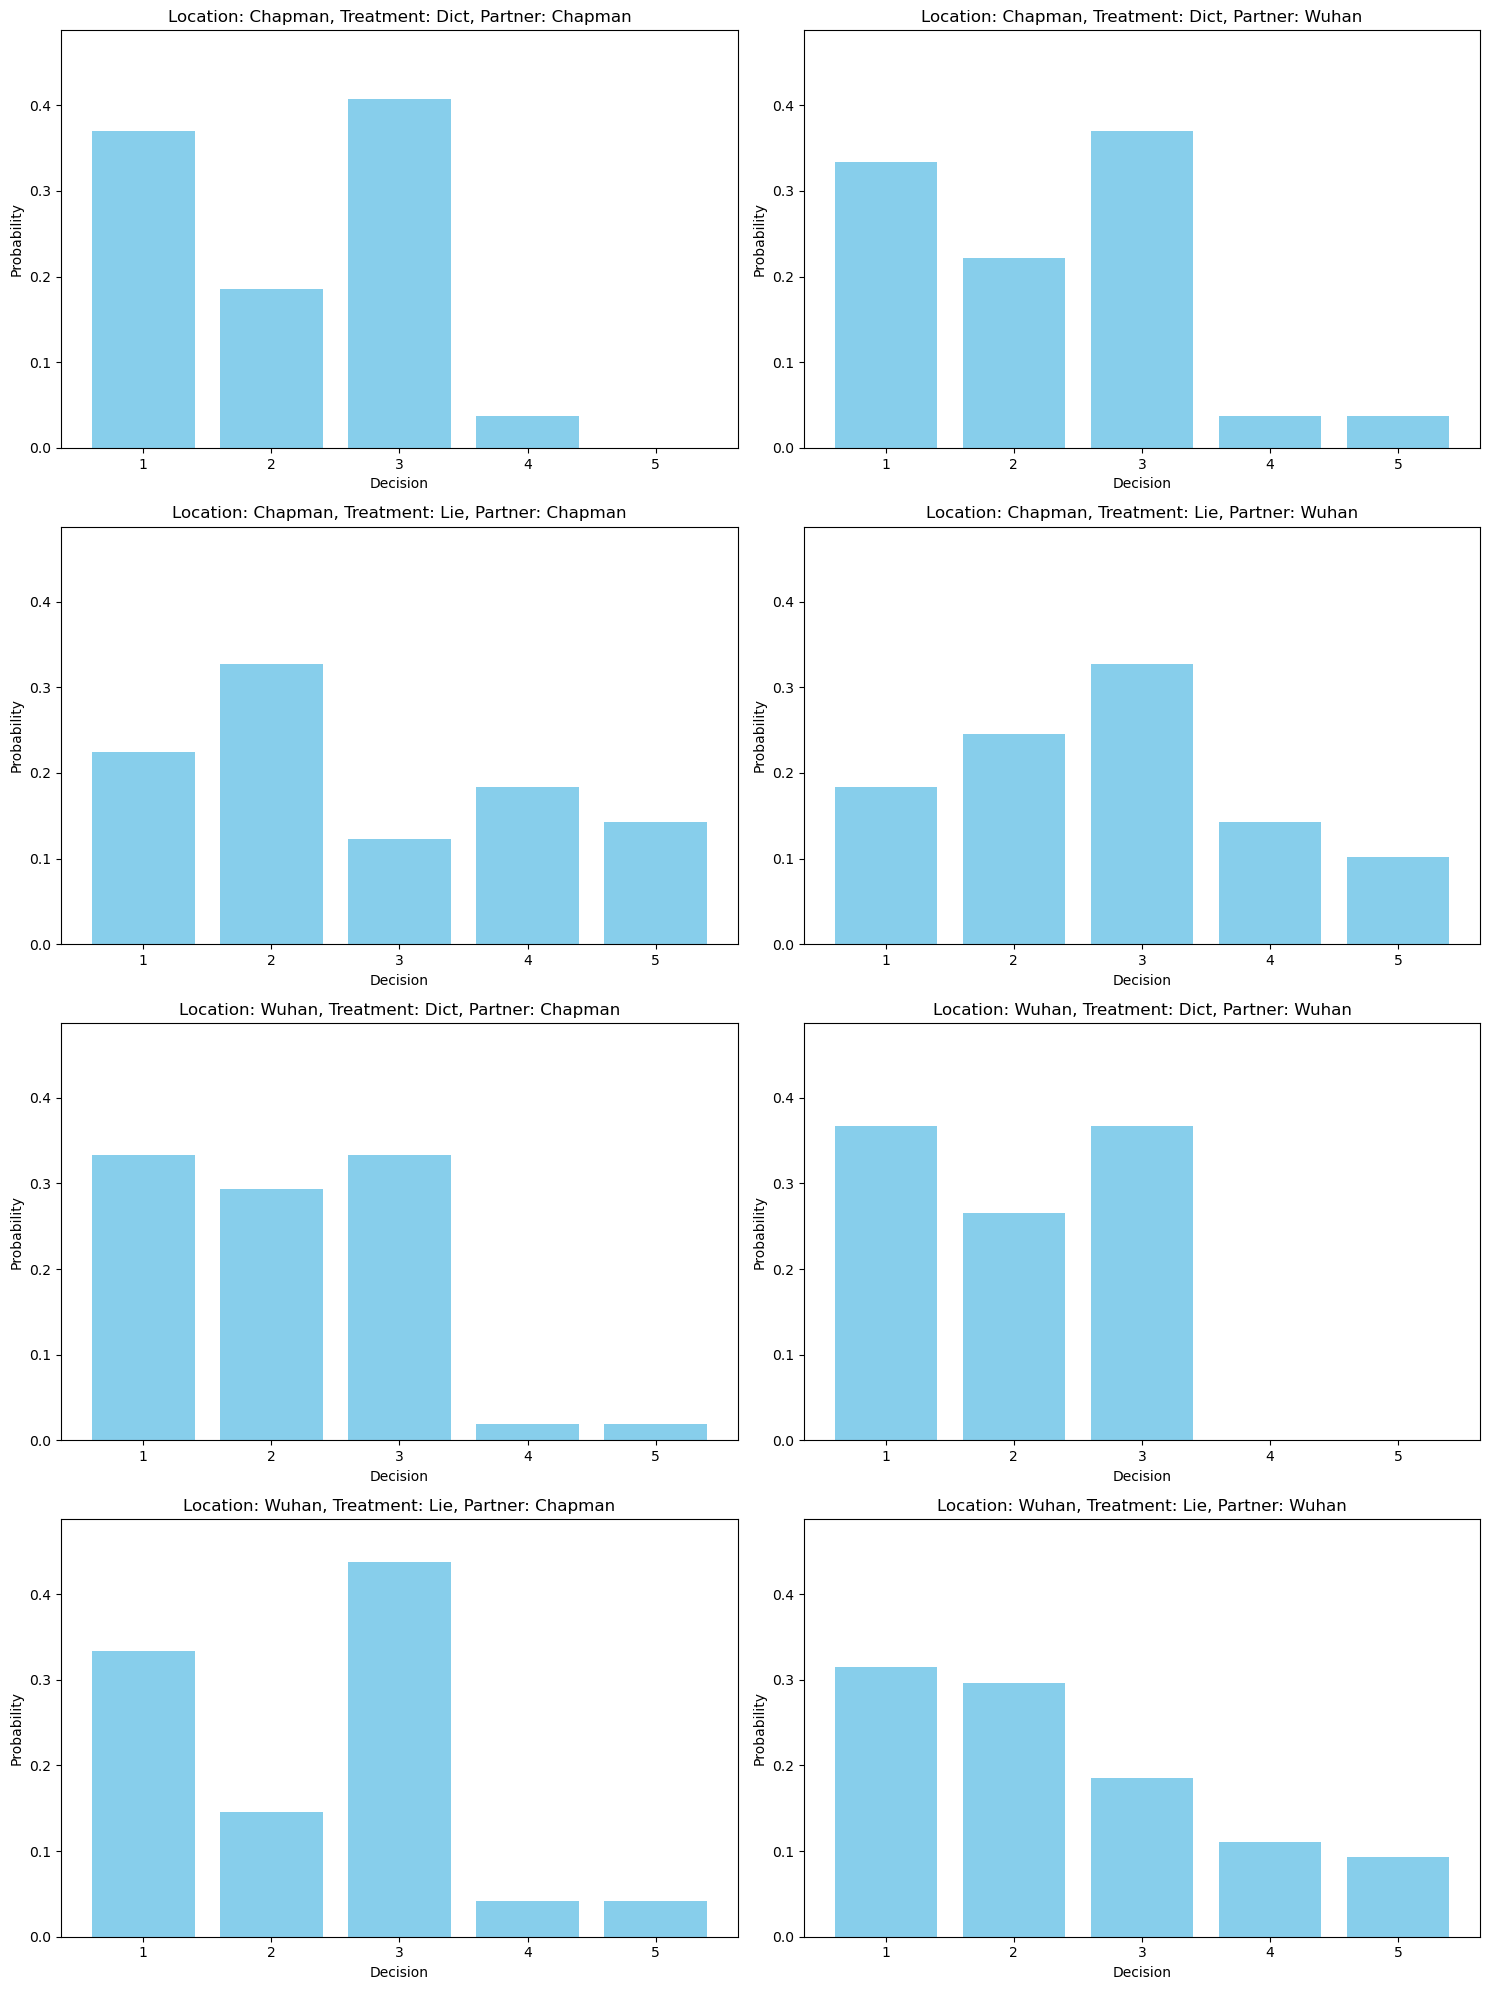

In [24]:
plot_pmf_by_combinations(altruism_df)

## Statistical Tests

### Tukey 

In [25]:
# Create a new column that combines the 'Location', 'Treatment', and 'Partner' into a single group identifier
altruism_df['Group'] = altruism_df['Location'] + ', ' + altruism_df['Treatment'] + ', ' + altruism_df['Partner']

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=altruism_df['decision'], groups=altruism_df['Group'], alpha=0.05)
print(tukey_results)


                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                 group2        meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------------------------
Chapman, Dict, Chapman  Chapman, Dict, Wuhan   0.1111 0.9996 -0.5472  0.7694  False
Chapman, Dict, Chapman Chapman, Lie, Chapman   0.5828 0.1478 -0.0921  1.2576  False
Chapman, Dict, Chapman   Chapman, Lie, Wuhan   0.6236  0.094 -0.0513  1.2984  False
Chapman, Dict, Chapman  Wuhan, Dict, Chapman  -0.0131    1.0 -0.6809  0.6548  False
Chapman, Dict, Chapman    Wuhan, Dict, Wuhan  -0.1111 0.9997  -0.786  0.5637  False
Chapman, Dict, Chapman   Wuhan, Lie, Chapman   0.2014 0.9856 -0.4771  0.8799  False
Chapman, Dict, Chapman     Wuhan, Lie, Wuhan   0.2593 0.9317  -0.399  0.9175  False
  Chapman, Dict, Wuhan Chapman, Lie, Chapman   0.4717 0.3976 -0.2032  1.1465  False
  Chapman, Dict, Wuhan   Chapman, Lie, Wuhan   0.5125 0.2886 -0.1624  1.1873

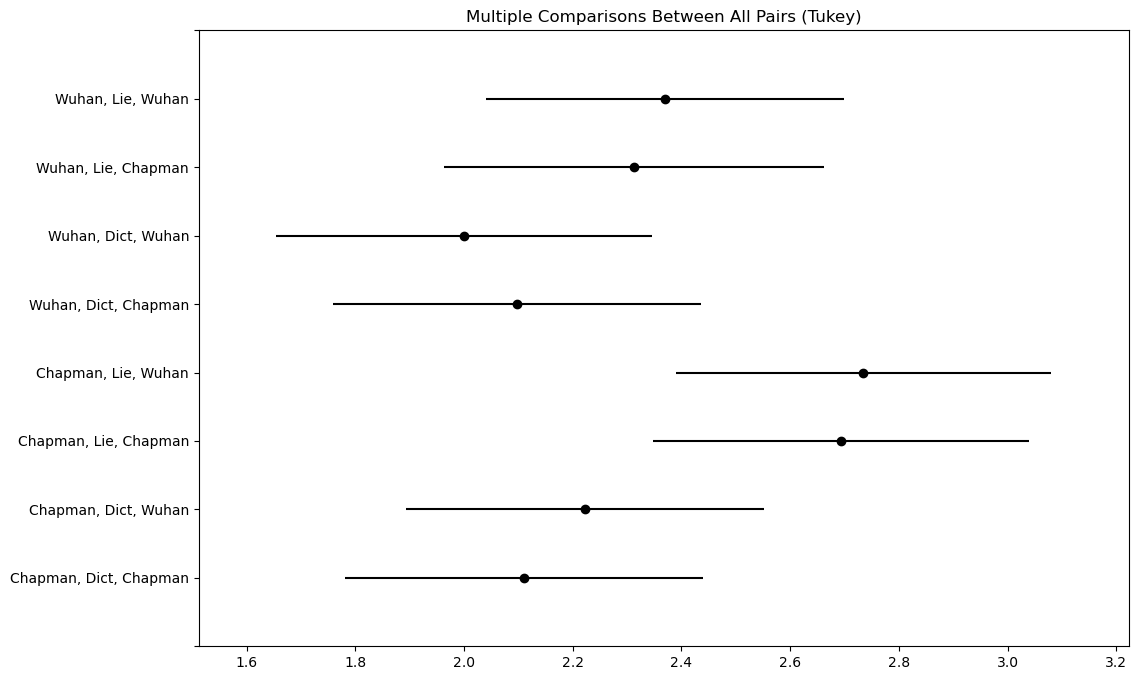

In [23]:
# Visualize the results
tukey_results.plot_simultaneous(figsize=(12, 8)) 
plt.show()

The above plot shows the confidence intervals for the mean differences between each of the 8 treatments.  Each line represents a treatment with the confidence intervals depicted horizontally.  An overlappinng interval indicates that the mean difference between the treatments is not statistically significant at the chosen alpha level (0.05) with Tukey's Honest Significant Difference test correction.

### Anova

In [2]:
def perform_anova(df, groups):
    """
    Perform ANOVA on specified groups within the DataFrame.
    
    Parameters:
    - df: The pandas DataFrame containing your data.
    - groups: A list of tuples, where each tuple contains the filter criteria
              for a specific group (e.g., Location and Treatment).
    
    Returns:
    - The F-value and p-value from the ANOVA test.
    """
    group_data = [df[(df['Location'] == location) & (df['Treatment'] == treatment) & (df['Partner'] == partner)]['decision'] 
                  for location, treatment, partner in groups]
    f_val, p_val = stats.f_oneway(*group_data)
    return f_val, p_val


In [10]:
all_groups = [
    ('Chapman', 'Dict', 'Chapman'),
    ('Chapman', 'Dict', 'Wuhan'),
    ('Chapman', 'Lie', 'Chapman'),
    ('Chapman', 'Lie', 'Wuhan'),
    ('Wuhan', 'Dict', 'Chapman'),
    ('Wuhan', 'Dict', 'Wuhan'),
    ('Wuhan', 'Lie', 'Chapman'),
    ('Wuhan', 'Lie', 'Wuhan')
]
chapman_groups = [
    ('Chapman', 'Dict', 'Chapman'),
    ('Chapman', 'Dict', 'Wuhan'),
    ('Chapman', 'Lie', 'Chapman'),
    ('Chapman', 'Lie', 'Wuhan')
]

wuhan_groups = [
    ('Wuhan', 'Dict', 'Chapman'),
    ('Wuhan', 'Dict', 'Wuhan'),
    ('Wuhan', 'Lie', 'Chapman'),
    ('Wuhan', 'Lie', 'Wuhan')
]

dict_groups = [
    ('Chapman', 'Dict', 'Chapman'),
    ('Chapman', 'Dict', 'Wuhan'),
    ('Wuhan', 'Dict', 'Chapman'),
    ('Wuhan', 'Dict', 'Wuhan')
]

lie_groups = [
    ('Chapman', 'Lie', 'Chapman'),
    ('Chapman', 'Lie', 'Wuhan'),
    ('Wuhan', 'Lie', 'Chapman'),
    ('Wuhan', 'Lie', 'Wuhan')
]

homogoneous_groups = [
    ('Chapman', 'Dict', 'Chapman'),
    ('Chapman', 'Lie', 'Chapman'),
    ('Wuhan', 'Dict', 'Wuhan'),
    ('Wuhan', 'Lie', 'Wuhan')
]

heterogenous_groups = [
    ('Chapman', 'Dict', 'Wuhan'),
    ('Chapman', 'Lie', 'Wuhan'),
    ('Wuhan', 'Dict', 'Wuhan'),
    ('Wuhan', 'Lie', 'Wuhan')
]

In [11]:
f_val, p_val = perform_anova(altruism_df, all_groups)
print(f"ANOVA for all treatments: F-value = {f_val}, p-value = {p_val}")

f_val_chap, p_val_chap = perform_anova(altruism_df, chapman_groups)
print(f"ANOVA for Chapman treatments: F-value = {f_val_chap}, p-value = {p_val_chap}")

f_val_wuh, p_val_wuh = perform_anova(altruism_df, wuhan_groups)
print(f"ANOVA for Wuhan treatments: F-value = {f_val_wuh}, p-value = {p_val_wuh}")

f_val_dict, p_val_dict = perform_anova(altruism_df, dict_groups)
print(f"ANOVA for Dictator treatments: F-value = {f_val_dict}, p-value = {p_val_dict}")

f_val_lie, p_val_lie = perform_anova(altruism_df, lie_groups)
print(f"ANOVA for Lying-Dictator treatments: F-value = {f_val_lie}, p-value = {p_val_lie}")

f_val_homog, p_val_homog = perform_anova(altruism_df, homogoneous_groups)
print(f"ANOVA for Homogeneous treatments: F-value = {f_val_homog}, p-value = {p_val_homog}")

f_val_hetero, p_val_hetero = perform_anova(altruism_df, heterogenous_groups)
print(f"ANOVA for Heterogeneous treatments: F-value = {f_val_hetero}, p-value = {p_val_hetero}")



ANOVA for all treatments: F-value = 2.925204594683677, p-value = 0.005370994451836951
ANOVA for Chapman treatments: F-value = 3.869442927996936, p-value = 0.010139992966277744
ANOVA for Wuhan treatments: F-value = 1.3418681938931296, p-value = 0.2619771029757586
ANOVA for Dictator treatments: F-value = 0.45066405884006366, p-value = 0.7171007614604796
ANOVA for Lying-Dictator treatments: F-value = 1.473420992977857, p-value = 0.22303568573382188
ANOVA for Homogeneous treatments: F-value = 3.587495320503707, p-value = 0.014684049787412641
ANOVA for Heterogeneous treatments: F-value = 3.681162253896787, p-value = 0.012985213715710599


### Chi-Squared

In [28]:
def perform_chi_squared_tests_for_pairs(df, group_by_col, decision_col='decision'):
    """
    Perform Chi-squared tests on the distribution of a decision variable across pairwise combinations of treatments.
    
    Parameters:
    - df: The pandas DataFrame containing your data.
    - group_by_col: Column name for grouping, typically 'Treatment' or similar.
    - decision_col: The decision column to test, defaults to 'decision'.
    
    Returns:
    - results: A list of dictionaries containing results for each pair.
    """
    results = []
    treatments = df[group_by_col].unique()
    pairs = itertools.combinations(treatments, 2)  # Get all unique pairs of treatments

    for treatment1, treatment2 in pairs:
        # Filter data for each treatment in the pair
        sub_df = df[df[group_by_col].isin([treatment1, treatment2])]
        
        # Create a contingency table
        contingency_table = pd.crosstab(sub_df[decision_col], sub_df[group_by_col])
        
        # Perform the Chi-squared test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Append the results
        results.append({
            'Treatment Pair': f'{treatment1} vs {treatment2}',
            'Chi2 Statistic': chi2,
            'P-value': p,
            #'Degrees of Freedom': dof,
            #'Expected Frequencies': expected
        })

    return results

In [29]:
results = perform_chi_squared_tests_for_pairs(altruism_df, 'Group')
for result in results:
    print(result)

{'Treatment Pair': 'Chapman, Dict, Chapman vs Chapman, Lie, Chapman', 'Chi2 Statistic': 24.409724026248053, 'P-value': 6.610428963814187e-05}
{'Treatment Pair': 'Chapman, Dict, Chapman vs Chapman, Dict, Wuhan', 'Chi2 Statistic': 2.3823194349510137, 'P-value': 0.6658247624879039}
{'Treatment Pair': 'Chapman, Dict, Chapman vs Chapman, Lie, Wuhan', 'Chi2 Statistic': 12.866980635424735, 'P-value': 0.011944375161946371}
{'Treatment Pair': 'Chapman, Dict, Chapman vs Wuhan, Lie, Chapman', 'Chi2 Statistic': 2.6533519954062594, 'P-value': 0.6174017335277829}
{'Treatment Pair': 'Chapman, Dict, Chapman vs Wuhan, Dict, Chapman', 'Chi2 Statistic': 3.134446663858429, 'P-value': 0.5355835211706703}
{'Treatment Pair': 'Chapman, Dict, Chapman vs Wuhan, Dict, Wuhan', 'Chi2 Statistic': 2.6601175990355466, 'P-value': 0.44704749219587603}
{'Treatment Pair': 'Chapman, Dict, Chapman vs Wuhan, Lie, Wuhan', 'Chi2 Statistic': 13.127858627858627, 'P-value': 0.01066766038344632}
{'Treatment Pair': 'Chapman, Lie, 

In [22]:
# focus on 1s, 2s, and 3s
altruism_df_filtered = altruism_df[altruism_df['decision'].isin([1, 2, 3])]
results = perform_chi_squared_tests_for_pairs(altruism_df_filtered, 'Group')
for result in results:
    print(result)

{'Treatment Pair': 'Chapman, Dict, Chapman vs Chapman, Lie, Chapman', 'Chi2 Statistic': 9.361045282261165, 'P-value': 0.00927416555983409, 'Degrees of Freedom': 2, 'Expected Frequencies': array([[18.96470588, 12.03529412],
       [15.90588235, 10.09411765],
       [17.12941176, 10.87058824]])}
{'Treatment Pair': 'Chapman, Dict, Chapman vs Chapman, Lie, Wuhan', 'Chi2 Statistic': 2.8545967692973133, 'P-value': 0.23995631701386333, 'Degrees of Freedom': 2, 'Expected Frequencies': array([[16.94382022, 12.05617978],
       [12.85393258,  9.14606742],
       [22.20224719, 15.79775281]])}
{'Treatment Pair': 'Chapman, Dict, Chapman vs Wuhan, Lie, Chapman', 'Chi2 Statistic': 0.3327561631255204, 'P-value': 0.846726042158613, 'Degrees of Freedom': 2, 'Expected Frequencies': array([[19.5       , 16.5       ],
       [ 9.20833333,  7.79166667],
       [23.29166667, 19.70833333]])}
{'Treatment Pair': 'Chapman, Dict, Chapman vs Wuhan, Dict, Chapman', 'Chi2 Statistic': 1.796745181360567, 'P-value': 0.

### Kolmogorov-Smirnov

Our data is not continuous

In [26]:
def run_ks_tests_with_correction(df, combinations):
    results = []
    n_combinations = len(combinations)
    # Calculate the number of tests for Bonferroni correction
    n_tests = n_combinations * (n_combinations - 1) / 2
    corrected_alpha = 0.05 / n_tests
    
    for (loc1, treat1, part1), (loc2, treat2, part2) in itertools.combinations(combinations, 2):
        group1 = df[(df['Location'] == loc1) & (df['Treatment'] == treat1) & (df['Partner'] == part1)]['decision']
        group2 = df[(df['Location'] == loc2) & (df['Treatment'] == treat2) & (df['Partner'] == part2)]['decision']
        
        ks_stat, p_value = ks_2samp(group1, group2)
        
        # Apply Bonferroni correction
        significant = 'Yes' if p_value < corrected_alpha else 'No'
        
        results.append({
            'Group 1': f'{loc1}, {treat1}, {part1}',
            'Group 2': f'{loc2}, {treat2}, {part2}',
            'KS Statistic': ks_stat,
            'P-value': p_value,
            'Significant After Correction': significant
        })
        
    return pd.DataFrame(results)

In [27]:
combinations = [
    ('Chapman', 'Dict', 'Chapman'),
    ('Chapman', 'Dict', 'Wuhan'),
    ('Chapman', 'Lie', 'Chapman'),
    ('Chapman', 'Lie', 'Wuhan'),
    ('Wuhan', 'Dict', 'Chapman'),
    ('Wuhan', 'Dict', 'Wuhan'),
    ('Wuhan', 'Lie', 'Chapman'),
    ('Wuhan', 'Lie', 'Wuhan')
]

results_df = run_ks_tests_with_correction(altruism_df, combinations)
print(results_df)

                   Group 1                Group 2  KS Statistic   P-value  \
0   Chapman, Dict, Chapman   Chapman, Dict, Wuhan      0.037037  1.000000   
1   Chapman, Dict, Chapman  Chapman, Lie, Chapman      0.289494  0.020436   
2   Chapman, Dict, Chapman    Chapman, Lie, Wuhan      0.207861  0.181779   
3   Chapman, Dict, Chapman   Wuhan, Dict, Chapman      0.071895  0.996464   
4   Chapman, Dict, Chapman     Wuhan, Dict, Wuhan      0.077098  0.992539   
5   Chapman, Dict, Chapman    Wuhan, Lie, Chapman      0.076389  0.994420   
6   Chapman, Dict, Chapman      Wuhan, Lie, Wuhan      0.166667  0.444707   
7     Chapman, Dict, Wuhan  Chapman, Lie, Chapman      0.252457  0.060375   
8     Chapman, Dict, Wuhan    Chapman, Lie, Wuhan      0.170824  0.384935   
9     Chapman, Dict, Wuhan   Wuhan, Dict, Chapman      0.071895  0.996464   
10    Chapman, Dict, Wuhan     Wuhan, Dict, Wuhan      0.077098  0.992539   
11    Chapman, Dict, Wuhan    Wuhan, Lie, Chapman      0.076389  0.994420   

### Epps-Singleton

This is the optimal test for our study.  Since we have discrete data, have more than 25 observations per cell, do not want a directional alternative hypothesis, &+.

In [30]:
# Chapman x Chapman | Lie vs Dict
sample1 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Chapman')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Chapman')]['decision']

# Perform the Epps-Singleton test
statistic, p_value = epps_singleton_2samp(sample1, sample2)
print(f"Epps-Singleton Test Statistic: {statistic}, P-value: {p_value}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 30.9073927224987, P-value: 3.1974843227760647e-06


In [31]:
# Chapman x Dict | Partner: Chapman vs Wuhan
sample1 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Chapman')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Wuhan')]['decision']

# Perform the Epps-Singleton test
statistic, p_value = epps_singleton_2samp(sample1, sample2)
print(f"Epps-Singleton Test Statistic: {statistic}, P-value: {p_value}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 2.4360551907434074, P-value: 0.6561215189019425


In [32]:
# Chapman x Lie | Partner: Chapman vs Wuhan
sample1 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Chapman')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Wuhan')]['decision']

# Perform the Epps-Singleton test
statistic, p_value = epps_singleton_2samp(sample1, sample2)
print(f"Epps-Singleton Test Statistic: {statistic}, P-value: {p_value}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 6.278203811503063, P-value: 0.17931287885461625


In [33]:
# Wuhan x Wuhan | Lie vs Dict
sample1 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Wuhan')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Wuhan')]['decision']

# Perform the Epps-Singleton test
statistic, p_value = epps_singleton_2samp(sample1, sample2)
print(f"Epps-Singleton Test Statistic: {statistic}, P-value: {p_value}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 16.648800869379095, P-value: 0.0022614122583777727


In [35]:
# Wuhan x Dict | Partner: Chapman vs Wuhan
sample1 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Chapman')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Wuhan')]['decision']

# Perform the Epps-Singleton test
statistic, p_value = epps_singleton_2samp(sample1, sample2)
print(f"Epps-Singleton Test Statistic: {statistic}, P-value: {p_value}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 2.290413303881728, P-value: 0.6825150076252811
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [36]:
# Wuhan x Lie | Partner: Chapman vs Wuhan
sample1 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Chapman')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Wuhan')]['decision']

# Perform the Epps-Singleton test
statistic, p_value = epps_singleton_2samp(sample1, sample2)
print(f"Epps-Singleton Test Statistic: {statistic}, P-value: {p_value}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 11.593299579612612, P-value: 0.020646282974759202
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [37]:
# Homogeneous Pairs | ChapxChap and WuhxWuh in Dict
sample1 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Chapman')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Wuhan')]['decision']

# Perform the Epps-Singleton test
statistic, p_value = epps_singleton_2samp(sample1, sample2)
print(f"Epps-Singleton Test Statistic: {statistic}, P-value: {p_value}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 2.9133307651554627, P-value: 0.4051817984585665


/Users/aaronberman/opt/anaconda3/envs/MGPGG_DA/lib/python3.9/site-packages/scipy/stats/_hypotests.py:131: UserWarning: Estimated covariance matrix does not have full rank. This indicates a bad choice of the input t and the test might not be consistent.
  warnings.warn('Estimated covariance matrix does not have full rank. '


In [38]:
# Homogeneous Pairs | ChapxChap and WuhxWuh in Lie
sample1 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Chapman')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Wuhan')]['decision']

# Perform the Epps-Singleton test
statistic, p_value = epps_singleton_2samp(sample1, sample2)
print(f"Epps-Singleton Test Statistic: {statistic}, P-value: {p_value}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 3.0637984391391915, P-value: 0.5472062347756019


In [39]:
# Heterogenous Pairs | ChapxWuh and WuhxChap in Dict
sample1 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Wuhan')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Chapman')]['decision']

# Perform the Epps-Singleton test
statistic, p_value = epps_singleton_2samp(sample1, sample2)
print(f"Epps-Singleton Test Statistic: {statistic}, P-value: {p_value}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 1.2068045424353657, P-value: 0.8769770286179875


In [40]:
# Heterogenous Pairs | ChapxWuh and WuhxChap in Lie
sample1 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Wuhan')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Chapman')]['decision']

# Perform the Epps-Singleton test
statistic, p_value = epps_singleton_2samp(sample1, sample2)
print(f"Epps-Singleton Test Statistic: {statistic}, P-value: {p_value}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 8.764341556301396, P-value: 0.06726743786566039
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Brunner-Munzel

Variation of the Mann Whitney U test that allows for unequal variance between the two samples

In [7]:
# Chapman x Chapman | Lie vs Dict
sample1 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Chapman')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Chapman')]['decision']

# Perform the Brunner-Munzel test
statistic, p_value = brunnermunzel(sample1, sample2)
print(f"Brunner-Munzel Test Statistic: {statistic}, P-value: {p_value}")

Brunner-Munzel Test Statistic: 1.972185892009216, P-value: 0.05172364851212419


In [8]:
# Chapman x Dict | Partner: Chapman vs Wuhan
sample1 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Chapman')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Wuhan')]['decision']

# Perform the Brunner-Munzel test
statistic, p_value = brunnermunzel(sample1, sample2)
print(f"Brunner-Munzel Test Statistic: {statistic}, P-value: {p_value}")

Brunner-Munzel Test Statistic: 0.36342535767885203, P-value: 0.7170113364222179


In [9]:
# Chapman x Lie | Partner: Chapman vs Wuhan
sample1 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Chapman')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Wuhan')]['decision']

# Perform the Brunner-Munzel test
statistic, p_value = brunnermunzel(sample1, sample2)
print(f"Brunner-Munzel Test Statistic: {statistic}, P-value: {p_value}")

Brunner-Munzel Test Statistic: 0.3370215797417468, P-value: 0.7368715822741172


In [10]:
# Wuhan x Wuhan | Lie vs Dict
sample1 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Wuhan')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Wuhan')]['decision']

# Perform the Brunner-Munzel test
statistic, p_value = brunnermunzel(sample1, sample2)
print(f"Brunner-Munzel Test Statistic: {statistic}, P-value: {p_value}")

Brunner-Munzel Test Statistic: 1.1143889441411954, P-value: 0.26784430058251996


In [11]:
# Wuhan x Dict | Partner: Chapman vs Wuhan
sample1 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Chapman')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Wuhan')]['decision']

# Perform the Brunner-Munzel test
statistic, p_value = brunnermunzel(sample1, sample2)
print(f"Brunner-Munzel Test Statistic: {statistic}, P-value: {p_value}")

Brunner-Munzel Test Statistic: -0.3562683929372186, P-value: 0.7224056047741975


In [12]:
# Wuhan x Lie | Partner: Chapman vs Wuhan
sample1 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Chapman')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Wuhan')]['decision']

# Perform the Brunner-Munzel test
statistic, p_value = brunnermunzel(sample1, sample2)
print(f"Brunner-Munzel Test Statistic: {statistic}, P-value: {p_value}")

Brunner-Munzel Test Statistic: -0.05487749405942381, P-value: 0.9563455872709608


In [13]:
# Homogeneous Pairs | ChapxChap and WuhxWuh in Dict
sample1 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Chapman')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Wuhan')]['decision']

# Perform the Brunner-Munzel test
statistic, p_value = brunnermunzel(sample1, sample2)
print(f"Brunner-Munzel Test Statistic: {statistic}, P-value: {p_value}")

Brunner-Munzel Test Statistic: -0.5626704428519513, P-value: 0.5749134853167583


In [14]:
# Homogeneous Pairs | ChapxChap and WuhxWuh in Lie
sample1 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Chapman')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Wuhan')]['decision']

# Perform the Brunner-Munzel test
statistic, p_value = brunnermunzel(sample1, sample2)
print(f"Brunner-Munzel Test Statistic: {statistic}, P-value: {p_value}")

Brunner-Munzel Test Statistic: -1.1825687419287154, P-value: 0.23980829348616953


In [15]:
# Heterogenous Pairs | ChapxWuh and WuhxChap in Dict
sample1 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Wuhan')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Dict') & (altruism_df['Partner'] == 'Chapman')]['decision']

# Perform the Brunner-Munzel test
statistic, p_value = brunnermunzel(sample1, sample2)
print(f"Brunner-Munzel Test Statistic: {statistic}, P-value: {p_value}")

Brunner-Munzel Test Statistic: -0.5386355564703953, P-value: 0.5913078438660737


In [16]:
# Heterogenous Pairs | ChapxWuh and WuhxChap in Lie
sample1 = altruism_df[(altruism_df['Location'] == 'Chapman') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Wuhan')]['decision']
sample2 = altruism_df[(altruism_df['Location'] == 'Wuhan') & (altruism_df['Treatment'] == 'Lie') & (altruism_df['Partner'] == 'Chapman')]['decision']

# Perform the Brunner-Munzel test
statistic, p_value = brunnermunzel(sample1, sample2)
print(f"Brunner-Munzel Test Statistic: {statistic}, P-value: {p_value}")

Brunner-Munzel Test Statistic: -1.6523716869223801, P-value: 0.10176491169432877


### One-Sample

In [10]:
df_lie = altruism_df[altruism_df['Treatment'] == 'Lie']

#### K-S

we violate the assumptions of the kolmogorov-smirnov test for one- and two-samples

In [15]:
# Define CDF for a uniform distribution over the range 1 to 5
def uniform_cdf(x):
    return np.where(x < 1, 0, np.where(x > 5, 1, (x - 1) / 4))

In [16]:
# Perform the one-sample K-S test for each group where Treatment == 'Lie'
results = []
for group, group_df in df_lie.groupby(['Location', 'Partner']):
    # group_df['decision'] contains the decisions for this subgroup
    statistic, p_value = kstest(group_df['decision'], uniform_cdf)
    results.append({'Group': group, 'KS Statistic': statistic, 'P-value': p_value})

# Display the results
for result in results:
    print(result)

{'Group': ('Chapman', 'Chapman'), 'KS Statistic': 0.30102040816326525, 'P-value': 0.00019578552535997823}
{'Group': ('Chapman', 'Wuhan'), 'KS Statistic': 0.2551020408163265, 'P-value': 0.0026768345633185753}
{'Group': ('Wuhan', 'Chapman'), 'KS Statistic': 0.41666666666666663, 'P-value': 4.6156841347748165e-08}
{'Group': ('Wuhan', 'Wuhan'), 'KS Statistic': 0.36111111111111116, 'P-value': 8.17424761876816e-07}


#### Chi-2

In [18]:
unique_decisions = [1, 2, 3, 4, 5]
num_decisions = len(unique_decisions)

# Perform the Chi-squared test for each group where Treatment == 'Lie'
results = []
for group, group_df in df_lie.groupby(['Location', 'Partner']):
    # Count occurrences of each decision
    observed_frequencies = group_df['decision'].value_counts().reindex(unique_decisions, fill_value=0)
    expected_frequencies = [len(group_df) / num_decisions] * num_decisions  # Uniform expected frequencies

    # Chi-squared test
    chi2_stat, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

    results.append({
        'Group': group,
        'Chi2 Statistic': chi2_stat,
        'P-value': p_value
    })

# Display the results
for result in results:
    print(result)

{'Group': ('Chapman', 'Chapman'), 'Chi2 Statistic': 6.408163265306122, 'P-value': 0.17066959885384034}
{'Group': ('Chapman', 'Wuhan'), 'Chi2 Statistic': 7.63265306122449, 'P-value': 0.10600012308438914}
{'Group': ('Wuhan', 'Chapman'), 'Chi2 Statistic': 30.541666666666668, 'P-value': 3.796392841091745e-06}
{'Group': ('Wuhan', 'Wuhan'), 'Chi2 Statistic': 11.370370370370368, 'P-value': 0.022702249251902496}
